In [2]:
# base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Важная настройка для корректной настройки pipeline!
import sklearn
sklearn.set_config(transform_output="pandas")

# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, OrdinalEncoder, TargetEncoder
from sklearn.model_selection import GridSearchCV, KFold

# for model learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

#models
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from catboost import CatBoostRegressor

# Metrics
from sklearn.metrics import *


# tunning hyperparamters model
import optuna

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('/home/zef/DS_Bootcamp/HousePrices/TempData/train.csv')
df.shape

(1460, 81)

In [7]:
Test = pd.read_csv('/home/zef/DS_Bootcamp/HousePrices/TempData/test.csv')
pd.DataFrame(data={'NaN_count': Test.isna().sum(), 'Sum':Test.count(), 'data_type':Test.dtypes})

,NaN_count,Sum,data_type
Id,0,1459,int64
MSSubClass,0,1459,int64
MSZoning,4,1455,object
LotFrontage,227,1232,float64
LotArea,0,1459,int64
Street,0,1459,object
Alley,1352,107,object
LotShape,0,1459,object
LandContour,0,1459,object
Utilities,2,1457,object


In [22]:
#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
NaNsD = pd.DataFrame(data={'NaN_count': df.isna().sum(), 'Sum':df.count(), 'data_type':df.dtypes})
NaNsD[(NaNsD['NaN_count'] == 0) & (NaNsD['data_type'] == 'object')]
DTP = df.select_dtypes('object')
Not_NaN_Col_Unique = DTP.nunique(axis=0,dropna=False).to_frame().rename(columns={0:'Uniqie_amount'})

OrdEncCol = Not_NaN_Col_Unique[Not_NaN_Col_Unique['Uniqie_amount'] == 2].index.to_list()
TrgEncCol = Not_NaN_Col_Unique[Not_NaN_Col_Unique['Uniqie_amount'] > 2].index.to_list()
Not_NaN_Col_Unique

temp = NaNsD[(NaNsD['NaN_count'] != 0) & (NaNsD['data_type'] == 'object')]

temp.insert(3,'Imp',['No','No','No','No','No','No','No','Mode','No','No','No','No','No','No','No','No'])
col_with_no = temp[temp['Imp'] == 'No'].index.to_list()
col_with_no

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [32]:
# for col in Not_NaN_Col_Unique.index.to_list():
#     print(df[col].nunique())

df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          3
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [24]:
df['SalePrice'] = df['SalePrice'].map(lambda x: np.log(x))

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.2, random_state=42)

In [26]:
X_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,Rec,922,Unf,0,392,1314,GasA,TA,Y,SBrkr,1314,0,0,1314,1,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1957.0,RFn,1,294,TA,TA,Y,250,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,799,799,GasA,Gd,Y,SBrkr,799,772,0,1571,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,RFn,2,380,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,NaN,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,796,796,GasA,Gd,Y,FuseA,796,0,0,796,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,P,328,0,164,0,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,TA,TA,BrkTil,Gd,TA,No,ALQ,569,Unf,0,162,731,GasA,Ex,Y,SBrkr,981,787,0,1768,1,0,1,1,3,1,Gd,7,Typ,2,TA,Detchd,1939.0,Unf,1,240,TA,TA,Y,0,0,264,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,218,Unf,0,808,1026,GasA,TA,Y,SBrkr,1026,665,0,1691,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Detchd,1924.0,Unf,1,308,TA,TA,Y,0,0,242,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal


In [27]:
ordinal_encoding_columns = OrdEncCol
target_encoding_columns = TrgEncCol
drop_features = ['Id']

imputer = ColumnTransformer(
    transformers = [
        ('cat_imputer_mf', SimpleImputer(strategy='most_frequent'), ['Electrical']),
        ('cat_imputer_no_class', SimpleImputer(strategy='constant',fill_value='absence'), col_with_no)
    ],
    verbose_feature_names_out = False,
    remainder = 'passthrough' 
)    

pp = imputer.fit_transform(X_train)
pp = pp.select_dtypes(include='object')


In [28]:
pp_cat = pp.nunique().to_frame().rename(columns={0:'Uniqie_amount'})
OrdEncCol = pp_cat[pp_cat['Uniqie_amount'] == 2].index.to_list()
TrgEncCol = pp_cat[pp_cat['Uniqie_amount'] > 2].index.to_list()
OrdEncCol, TrgEncCol

(['Street', 'Utilities', 'CentralAir'],
 ['Electrical',
  'Alley',
  'MasVnrType',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'PoolQC',
  'Fence',
  'MiscFeature',
  'MSZoning',
  'LotShape',
  'LandContour',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'Heating',
  'HeatingQC',
  'KitchenQual',
  'Functional',
  'PavedDrive',
  'SaleType',
  'SaleCondition'])

In [29]:
oh = OneHotEncoder(sparse_output=False)

corrT = pd.concat([oh.fit_transform(pp),y_train],axis=1).corr()
corrT = corrT.loc['SalePrice'].to_frame()
corrT[corrT['SalePrice'].map(abs) >= 0.5]

,SalePrice
FireplaceQu_absence,-0.507096
ExterQual_TA,-0.583588
Foundation_PConc,0.518922
KitchenQual_TA,-0.527992
SalePrice,1.000000


In [30]:
OrdEncCol, TrgEncCol

Categorial_NonNan_Encoder = ColumnTransformer(
    transformers = [
        ('drop_features', 'drop', drop_features), #дроп id
        ('ordinal_encoding', OrdinalEncoder(dtype='int64'), OrdEncCol),
        ('target_encoding_columns',TargetEncoder(target_type='continuous'),TrgEncCol)
    ],
    verbose_feature_names_out = False,
    remainder = 'passthrough' 
)    

Encoded_Cat_Scaler = ColumnTransformer(
    [
        ('scaling_num_columns', StandardScaler(), standard_scaler_columns)
    ],
    verbose_feature_names_out = False,
    remainder = 'passthrough' 
)

NNE = Categorial_NonNan_Encoder.fit_transform(X_train,y_train)

NameError: name 'standard_scaler_columns' is not defined

In [ ]:
NNE.head(10)

,Street,Utilities,CentralAir,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
254,1,0,1,12.084313,12.042384,11.940107,12.027056,12.012019,12.023421,11.866701,12.046418,12.028114,12.051016,12.007887,11.987616,12.023497,11.869450,11.875232,11.902157,11.850200,11.966438,11.865393,11.812199,12.045730,11.957364,11.824557,12.044142,12.037103,11.823063,12.065300,11.824247,12.041414,11.818899,12.153210,12.172011,12.073024,12.075748,12.062750,12.026969,12.064794,12.031849,11.994742,12.009567,20,70.0,8400,5,6,1957,1957,0.0,922,0,392,1314,1314,0,0,1314,1,0,1,0,3,1,5,0,1957.0,1,294,250,0,0,0,0,0,0,6,2010
1066,1,0,1,12.085929,12.047865,12.147296,12.030651,12.015540,12.027573,12.189874,12.046576,12.031434,12.051551,12.188126,11.989443,12.029169,12.194089,12.197107,11.909507,12.301252,12.051084,12.256955,12.181936,12.050698,11.959737,11.980978,12.044926,12.040436,11.902623,12.066303,11.823694,12.049264,12.195236,12.163256,12.186691,12.072633,12.075780,12.066144,12.029060,12.064686,12.037222,12.003267,12.009057,60,59.0,7837,6,7,1993,1994,0.0,0,0,799,799,799,772,0,1571,0,0,2,1,3,1,7,1,1993.0,2,380,0,40,0,0,0,0,0,5,2009
638,1,0,1,12.085592,12.045985,11.952769,12.030464,12.014923,12.027134,11.726141,11.816468,12.030420,12.058721,12.001020,11.990218,12.027944,11.856749,11.846080,11.904857,11.854970,12.050777,11.885508,11.635773,12.050520,11.969470,11.991235,12.050076,12.039534,11.906710,11.694411,11.830322,12.045886,11.818531,11.486041,11.486041,11.486041,11.486041,11.822746,12.027364,11.895383,12.034605,12.000729,12.009774,30,67.0,8777,5,7,1910,1950,0.0,0,0,796,796,796,0,0,796,0,0,1,0,2,1,4,0,NaN,0,0,328,0,164,0,0,0,0,5,2008
799,1,0,1,12.084313,12.042384,11.940107,12.027056,12.001167,12.023421,11.853492,11.811318,12.028114,12.051016,11.812582,11.987616,12.023497,11.837833,11.876829,12.150589,11.850200,12.046972,11.786727,12.180520,12.045730,11.957364,11.964840,12.044142,12.037103,12.223484,12.065300,12.217315,12.041414,12.170901,11.793646,11.835940,12.073024,12.075748,12.062750,12.026969,11.854844,12.031849,11.994742,12.009567,50,60.0,7200,5,7,1937,1950,252.0,569,0,162,731,981,787,0,1768,1,0,1,1,3,1,7,2,1939.0,1,240,0,0,264,0,0,0,0,6,2007
380,1,0,1,12.084313,12.012931,11.940107,12.027056,12.012019,12.023421,11.853492,12.046418,12.028114,12.051016,11.812582,11.987616,12.023497,12.167611,11.876829,11.902157,11.850200,12.046972,11.786727,11.812199,12.045730,11.957364,11.858246,12.044142,12.037103,11.823063,12.065300,12.217315,12.041414,12.264047,11.793646,11.835940,12.073024,12.075748,12.062750,12.026969,12.064794,12.031849,11.994742,12.009567,50,50.0,5000,5,6,1924,1950,0.0,218,0,808,1026,1026,665,0,1691,0,0,2,0,3,1,6,1,1924.0,1,308,0,0,242,0,0,0,0,5,2010
303,1,0,1,12.081230,12.042870,11.948089,12.031357,11.999202,12.026759,12.185906,12.048360,12.031431,12.050658,11.998917,11.989649,12.026411,12.206852,12.213247,11.908546,11.849286,12.054656,12.258982,11.822033,12.052574,11.960177,11.930835,12.047447,12.039120,11.832174,12.062404,11.825421,12.049264,11.813824,12.161644,11.830299,12.072755,12.076660,12.063536,12.026537,11.782814,12.034118,11.998906,11.838390,20,70.0,9800,5,7,1972,1972,0.0,894,0,0,894,894,0,0,894,1,0,1,0,3,1,5,0,1975.0,2,552,256,0,0,0,0,0,0,7,2006
86,1,0,1,12.084313,12.042384,12.2969

<Axes: >

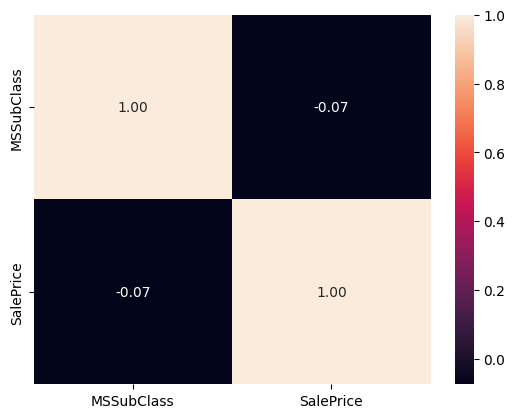

In [ ]:
sns.heatmap(df[['MSSubClass','SalePrice']].corr(),annot = True, fmt='.2f')

In [ ]:

# scaler_and_encoder = ColumnTransformer(
#     [
#         ('ordinal_encoding', OrdinalEncoder(), ordinal_encoding_columns),
#         #('one_hot_encoding_columns', OneHotEncoder(sparse_output=False), one_hot_encoding_columns),
#         ('target_encoding_columns',TargetEncoder(target_type='continuous'),target_encoding_columns),
#         ('scaling_num_columns', StandardScaler(), standard_scaler_columns)
#     ],
#     verbose_feature_names_out = False,
#     remainder = 'passthrough' 
# )

# preprocessor = Pipeline(
#     [
#         ('imputer', my_imputer),
#         ('scaler_and_encoder', scaler_and_encoder)
#     ]
# )

# ff = preprocessor.fit_transform(X_train, y_train)
# ff.head()